# Task 2 extra: Clustering

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import euclidean_distances

## Loading the Customer Profile model

In [4]:
extra_customer_profile = pd.read_csv('dataset/extra_customer_profile_model.csv', sep='\t', index_col=0)
extra_customer_profile

,Savg,categ_-1,categ_0,categ_1,categ_2,categ_3,categ_4
CustomerID,,,,,,,
12347.0,2.777935,44.678882,13.807421,3.768540,20.644987,15.768952,1.331217
12348.0,2.417438,37.193412,44.668808,0.000000,7.490694,10.647086,0.000000
12349.0,3.163623,38.147576,23.022195,7.279339,14.543583,7.724606,9.282700
12350.0,2.468938,68.885870,12.364130,0.000000,0.000000,6.725543,12.024457
12352.0,2.324080,40.933769,32.037047,4.362223,21.493429,1.173533,0.000000
...,...,...,...,...,...,...,...
18280.0,2.256718,47.785161,32.613511,0.000000,9.800664,0.000000,9.800664
18281.0,1.907519,60.653304,18.930958,0.000000,0.000000,20.415739,0.000000
18282.0,1.945961,27.740657,7.219706,7.061155,47.955832,10.022650,0.000000


## Standardization \& Dimensionality Reduction

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

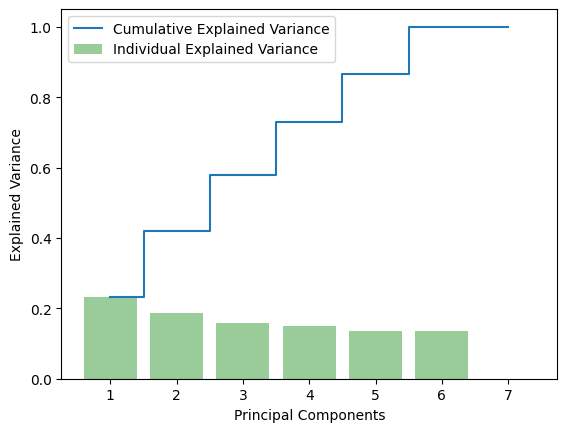

In [6]:
scaler = StandardScaler()
std_extra_customer_profile = scaler.fit_transform(extra_customer_profile)

pca = PCA()
pca.fit(std_extra_customer_profile)

plt.step(range(1, extra_customer_profile.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), 
         where='mid', label='Cumulative Explained Variance')
plt.bar(range(1, extra_customer_profile.shape[1] + 1), pca.explained_variance_ratio_, 
        alpha=0.4, color='g', label='Individual Explained Variance')

plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='upper left');

The graph shows the amount of variance captured depending on the number of components we include. A rule of thumb is to preserve around 80% of the variance. So, in this instance, we decide to keep 5 components.

In [7]:
pca = PCA(n_components=5)
pca_extra_customer_profile = pca.fit_transform(std_extra_customer_profile)

## Data Visualization


t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction method (e.g., PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples.

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
tsne_extra_customer_profile = tsne.fit_transform(pca_extra_customer_profile)
fig = plt.figure(1, figsize=(8,7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(*tsne_extra_customer_profile.T, s=20, alpha=0.7)
ax.set_xlabel('tsne_1')
ax.set_ylabel('tsne_2')
ax.set_zlabel('tsne_3');

<Figure size 800x700 with 0 Axes>

## K-Means

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [10]:
def plot_silhouette_score(df, labels):
    cluster_labels = np.unique(labels)
    n_clusters = cluster_labels.shape[0]
    
    silhouette_vals = silhouette_samples(df, labels)

    y_ax_lower, y_ax_upper = 0, 0
    y_tick = []

    for i, c in enumerate(cluster_labels):
    
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
    
        print('Cluster', c, 'avg silhouette:', np.mean(c_silhouette_vals))
    
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i)/n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        y_tick.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    print('Total avg silhouette:', silhouette_avg)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.yticks=(y_tick, cluster_labels + 1)
    plt.ylabel('Points')
    plt.xlabel('Silhouette')
    plt.tight_layout()

In [11]:
silhouette = dict()
for k in range(2, 15):
    kmeans = KMeans(init='k-means++', n_clusters=k)
    clusters = kmeans.fit_predict(pca_extra_customer_profile)
    silhouette[k] = silhouette_score(pca_extra_customer_profile, clusters)

C:\Users\akila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

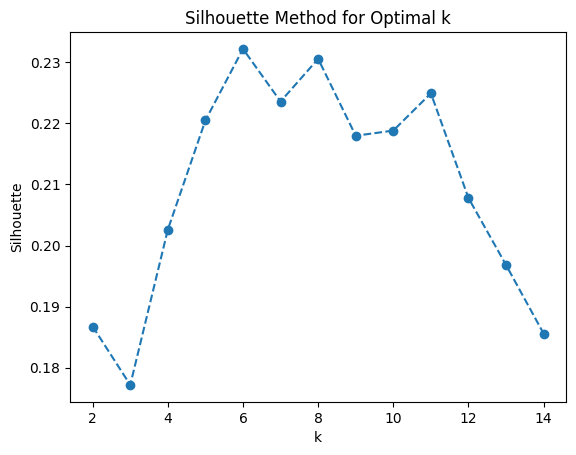

In [12]:
plt.plot(*zip(*silhouette.items()), marker='o', linestyle='--')
plt.title('Silhouette Method for Optimal k')
plt.ylabel('Silhouette')
plt.xlabel('k');

In [13]:
print('The best (k, silhouette score) is:', max(silhouette.items(), key=lambda t: t[1]))

The best (k, silhouette score) is: (6, 0.23217625982448917)


In [14]:
kmeans = KMeans(init='k-means++', n_clusters=6)
clusters_customers = kmeans.fit_predict(pca_extra_customer_profile)

C:\Users\akila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 avg silhouette: 0.2584669164694132
Cluster 1 avg silhouette: 0.20684909928000125
Cluster 2 avg silhouette: 0.1576235855256635
Cluster 3 avg silhouette: 0.22571511341749334
Cluster 4 avg silhouette: 0.22726726714305603
Cluster 5 avg silhouette: 0.2258486879281176
Total avg silhouette: 0.23199009268904852


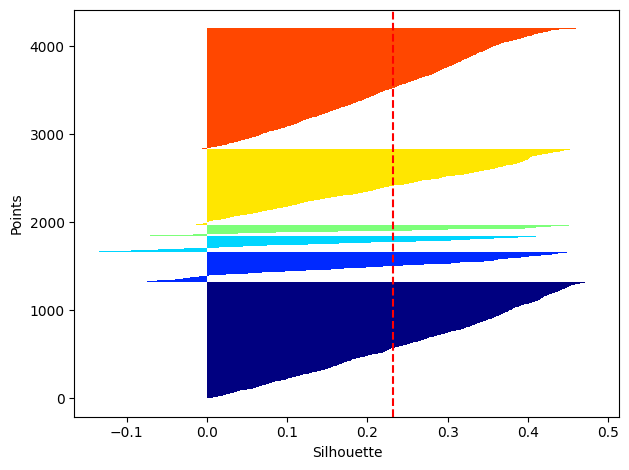

In [15]:
plot_silhouette_score(pca_extra_customer_profile, clusters_customers)

In [16]:
fig = plt.figure(1, figsize=(8,7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(*tsne_extra_customer_profile.T, c=clusters_customers, s=20, alpha=0.7)
ax.set_xlabel('tsne_1')
ax.set_ylabel('tsne_2')
ax.set_zlabel('tsne_3');

<Figure size 800x700 with 0 Axes>

In [17]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns=['CustomersNb']).T.sort_index(axis=1)

,0,1,2,3,4,5
CustomersNb,1326,342,178,124,868,1367


In [18]:
extra_customer_profile_kmeans = extra_customer_profile.copy(deep=True)
extra_customer_profile_kmeans['cluster'] = clusters_customers
extra_customer_profile_kmeans

,Savg,categ_-1,categ_0,categ_1,categ_2,categ_3,categ_4,cluster
CustomerID,,,,,,,,
12347.0,2.777935,44.678882,13.807421,3.768540,20.644987,15.768952,1.331217,5
12348.0,2.417438,37.193412,44.668808,0.000000,7.490694,10.647086,0.000000,0
12349.0,3.163623,38.147576,23.022195,7.279339,14.543583,7.724606,9.282700,5
12350.0,2.468938,68.885870,12.364130,0.000000,0.000000,6.725543,12.024457,4
12352.0,2.324080,40.933769,32.037047,4.362223,21.493429,1.173533,0.000000,0
...,...,...,...,...,...,...,...,...
18280.0,2.256718,47.785161,32.613511,0.000000,9.800664,0.000000,9.800664,4
18281.0,1.907519,60.653304,18.930958,0.000000,0.000000,20.415739,0.000000,4
18282.0,1.945961,27.740657,7.219706,7.061155,47.955832,10.022650,0.000000,1


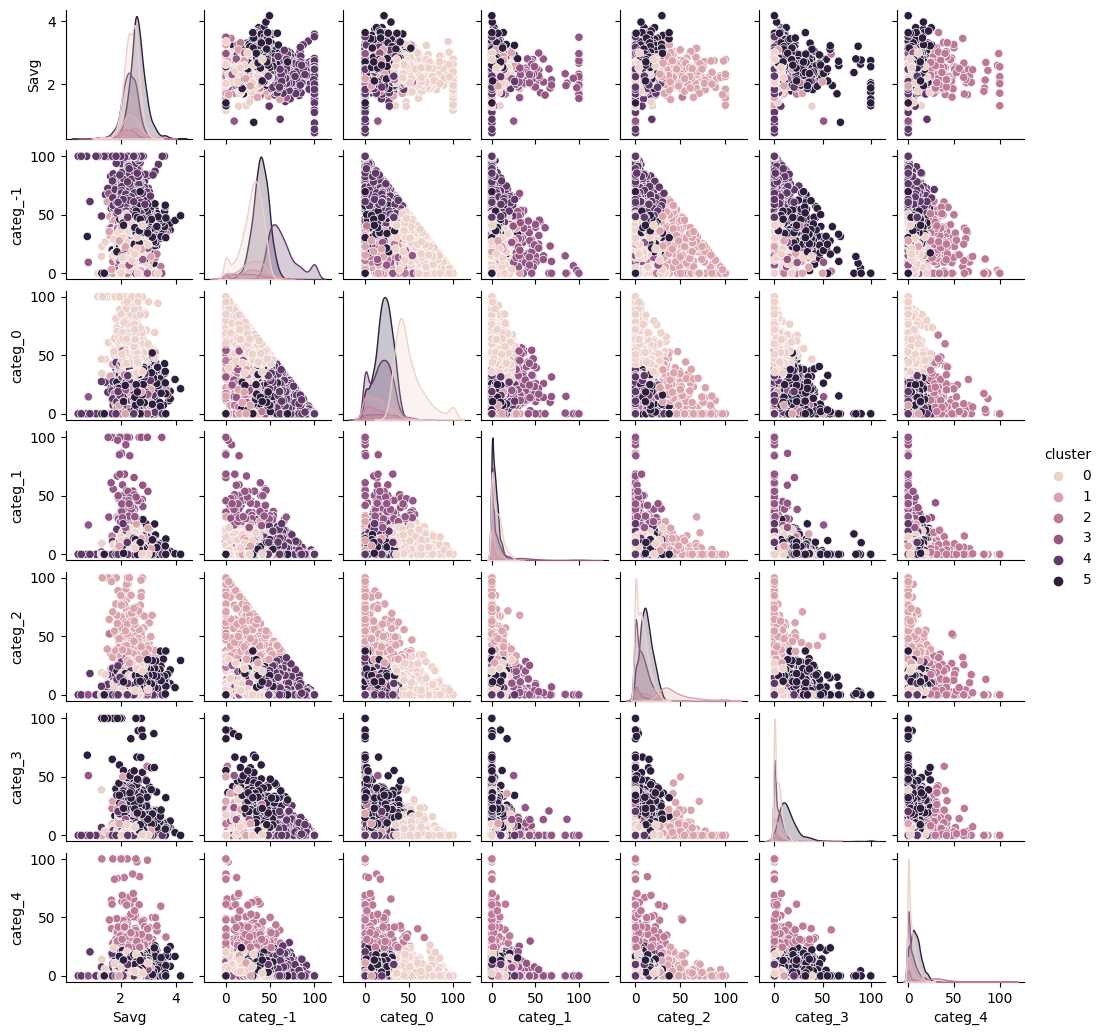

In [19]:
sns.pairplot(extra_customer_profile_kmeans, hue='cluster', diag_kind='kde', height=1.5);

In [20]:
extra_customer_profile_kmeans.to_csv('dataset/extra_customer_profile_kmeans.csv', sep='\t')